In [3]:
!pip install -U scikit-learn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [5]:
o_data = pd.read_csv('./crime.csv')

In [6]:
data = o_data[['area_name', 'danger', 'area']]
data

,area_name,danger,area
0,CHITRANJAN PARK,686,2.659330
1,DABRI,836,3.401013
2,MALVIYA NAGAR,1157,1.379854
3,CHANDNI MAHAL,730,5.570696
4,MODEL TOWN,658,2.689157
...,...,...,...
161,G.T.B. ENCLAVE,181,2.874304
162,NEW USMANPUR,698,3.093393
163,SONIA VIHAR,668,4.453887
164,KARAWAL NAGAR,617,2.937547


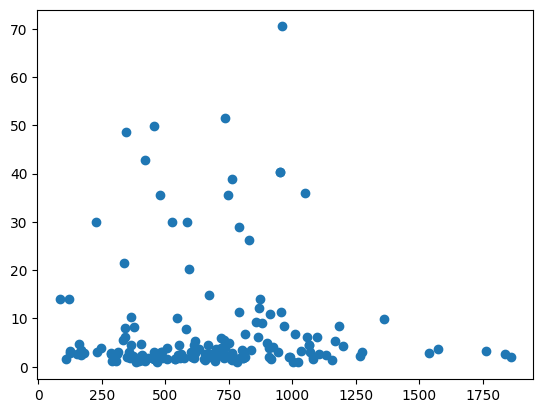

In [7]:
plt.scatter(data['danger'], data['area'])

In [8]:
max_area = data['area'].max()
max_danger = data['danger'].max()

data['area'] = data['area'] / max_area
data['danger'] = data['danger'] / max_danger

data

C:\Users\Omkar Mishra\AppData\Local\Temp\ipykernel_33040\1299236545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['area'] = data['area'] / max_area
C:\Users\Omkar Mishra\AppData\Local\Temp\ipykernel_33040\1299236545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['danger'] = data['danger'] / max_danger


,area_name,danger,area
0,CHITRANJAN PARK,0.368619,0.037737
1,DABRI,0.449221,0.048262
2,MALVIYA NAGAR,0.621709,0.019581
3,CHANDNI MAHAL,0.392262,0.079051
4,MODEL TOWN,0.353573,0.038161
...,...,...,...
161,G.T.B. ENCLAVE,0.097260,0.040788
162,NEW USMANPUR,0.375067,0.043897
163,SONIA VIHAR,0.358947,0.063203
164,KARAWAL NAGAR,0.331542,0.041685


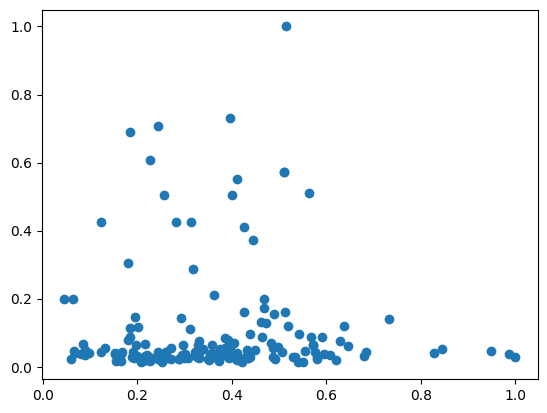

In [9]:
plt.scatter(data['danger'], data['area'])

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

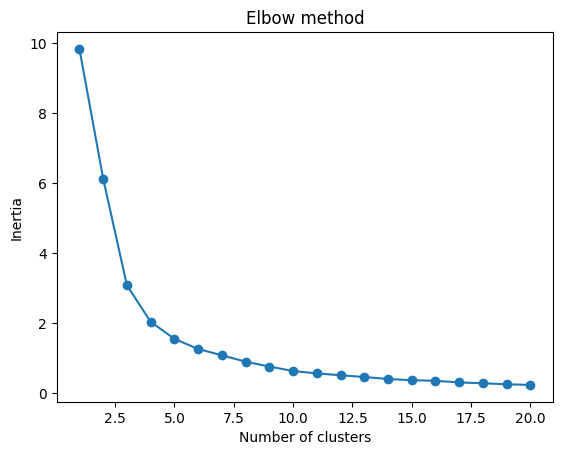

In [10]:
inertias = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[['area', 'danger']])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,21), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Omkar Mishra\AppData\Local\Temp\ipykernel_33040\960434549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = pred


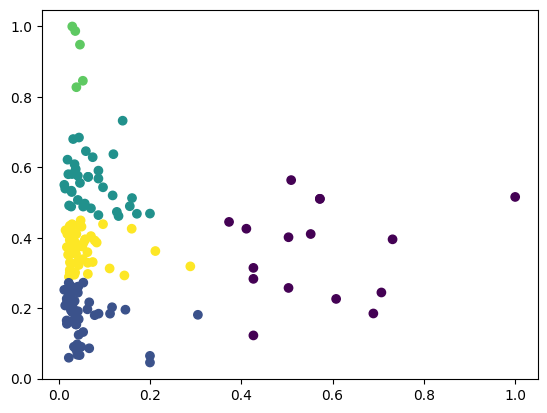

In [11]:
kmeans = KMeans(n_clusters=5)
pred = kmeans.fit_predict(data[['area', 'danger']])

data['cluster'] = pred
o_data['cluster'] = pred

labels = kmeans.labels_



plt.scatter(data['area'], data['danger'], c=kmeans.labels_)
plt.show()

In [12]:
o_data['cluster']

0      4
1      4
2      2
3      4
4      4
      ..
161    1
162    4
163    4
164    4
165    1
Name: cluster, Length: 166, dtype: int32

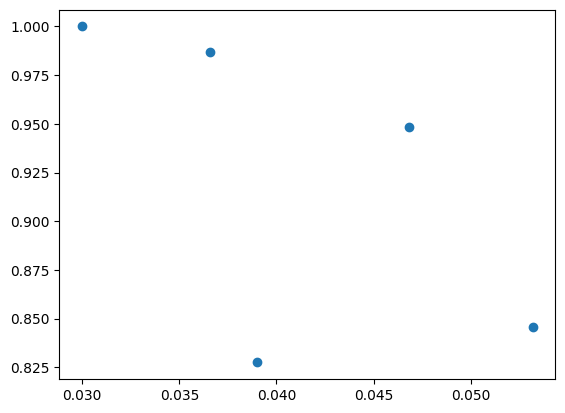

,area_name,danger,area,cluster
18,PUNJABI BAGH,0.987104,0.036573,3
31,BARAKHAMBA ROAD,0.845782,0.053192,3
93,UTTAM NAGAR,0.827512,0.038987,3
130,SUNLIGHT COLONY,1.000000,0.029973,3
132,NEW ASHOK NAGAR,0.948415,0.046840,3


In [30]:

cl_0 = data[(data['cluster'] == 3)]

plt.scatter(cl_0['area'], cl_0['danger'])
plt.show()

cl_0


In [18]:
# is for cluster number next is dangerousness

#0 purple - 0
#1 dark blue - 1
#2 sea green - 3
#3 light green - 4
#4 yellow - 2

In [21]:
o_data = o_data[['area_name', 'lat', 'long', 'cluster']]
o_data

,area_name,lat,long,cluster
0,CHITRANJAN PARK,28.53632,77.24920,4
1,DABRI,28.61268,77.08600,4
2,MALVIYA NAGAR,28.52989,77.20418,2
3,CHANDNI MAHAL,28.64361,77.23608,4
4,MODEL TOWN,28.70257,77.19369,4
...,...,...,...,...
161,G.T.B. ENCLAVE,28.68496,77.31600,1
162,NEW USMANPUR,28.67202,77.26207,4
163,SONIA VIHAR,28.71128,77.25611,4
164,KARAWAL NAGAR,28.73284,77.27450,4


In [41]:
cl_5 = o_data[o_data['cluster'] == 3]
cl_4 = o_data[o_data['cluster'] == 2]
cl_3 = o_data[o_data['cluster'] == 4]
cl_2 = o_data[o_data['cluster'] == 1]
cl_1 = o_data[o_data['cluster'] == 0]
cl_1

,area_name,lat,long,cluster
12,KANJHAWALA,28.72582,77.00361,0
19,DWARKA NORTH,28.60369,77.01564,0
26,FATEHPUR BERI,28.46549,77.15114,0
42,JAFFARPUR KALAN,28.59572,76.91555,0
47,ALIPUR,28.79903,77.13913,0
51,BAWANA,28.79654,77.04254,0
52,BEGUM PUR,28.72449,77.05179,0
102,DWARKA SOUTH,28.57837,77.06666,0
109,SHAHBAD DAIRY,28.74766,77.07894,0
111,DWARKA SEC-23,28.56411,77.05849,0


In [42]:
cl_5.to_json('cl_5.json', orient='records')
cl_4.to_json('cl_4.json', orient='records')
cl_3.to_json('cl_3.json', orient='records')
cl_2.to_json('cl_2.json', orient='records')
cl_1.to_json('cl_1.json', orient='records')